# Decision Tree using Gini Index

In [1]:
import pandas as pd
import numpy as np

In [2]:
trainData = pd.read_csv("../Datasets/train-data.csv")

In [3]:
trainData.head()

,CGPA,Intractiveness,Practical Knowledge,Communication skill,Job offer
0,>=9,yes,very good,good,yes
1,>=8,no,good,moderate,yes
2,>=9,no,average,poor,no
3,<8,no,average,good,no
4,>=8,yes,good,moderate,yes


In [4]:
class DecisionTree:
    def __init__(self,data,features,label):
        
        self.gini = self.calcGini(data,label)
        
        if self.gini == 0:
            
            self.type = "Decision"
            self.result = data[label].unique()[0]
            
            self.details()
            
            return
        
        delGinis = {}
        branches = {}
        
        for feature in features:
            
            values = data[feature].unique()
            validCombinations = self.calcValidCombinations(values)
            minGiniA = 100
            minCombination = []
            
            for combination in validCombinations:
                                
                giniA = self.calcGiniA(data,feature,combination,label)
                
                if minGiniA > giniA:
                    
                    minCombination = []
                    minGiniA = giniA
                    li = [x for x in list(values) if x not in combination]
                    minCombination.append(combination)
                    minCombination.append(li)
            
            delGinis[feature] = self.gini - minGiniA
            branches[feature] = minCombination  
            
        maxDelGini = max(zip(delGinis.values(), delGinis.keys()))
        self.type = "Condition"
        self.feature = maxDelGini[1]
        self.delGini = maxDelGini[0]
        self.combination = branches[self.feature]
        self.branches = {}
        self.details()
        
        features.remove(self.feature)
        
        for combination in self.combination:
            
            filteredData = pd.DataFrame(columns = data.columns)                
            
            for value in combination:
                filteredData = filteredData.append(data[data[self.feature]==value])
            
            node = DecisionTree(filteredData,features,label)
            self.branches[tuple(combination)] = node
        
    def calcValidCombinations(self,values):
        
        n = len(values)
        validCombinations = []
        
        for i in range(1 << n):
            
            curr = [values[j] for j in range(n) if (i & (1 << j))]
            
            if curr != [] and len(curr) != n:
                
                validCombinations.append(curr)

        return validCombinations[:int(len(validCombinations)/2)]
                                                       

    def calcGini(self,data,label):
        
        values = data[label].unique()
        gini = 0
        
        for value in values:
        
            prob = len(data[data[label] == value])/len(data)
            gini += ( np.square(prob) )
        
        return 1-gini
                                                       
    
    def calcGiniA (self,data,feature,combination,label):
        
        values = list(data[feature].unique())
        
        filteredData1 = pd.DataFrame(columns = data.columns)
        filteredData2 = pd.DataFrame(columns = data.columns)
        
        for val in combination:
            filteredData1 = filteredData1.append(data[data[feature]==val])
            values.remove(val)
        
        for val in values:
            filteredData2 = filteredData2.append(data[data[feature]==val])
            
        
        p1 = len(filteredData1)/len(data)
        p2 = len(filteredData2)/ len(data)
        
        gini1 = self.calcGini(filteredData1,label)
        gini2 = self.calcGini(filteredData2,label)
                                                 
        return p1*gini1 + p2*gini2
            
    
    def details(self):
        print("Type:", self.type)
        
        if self.type == "Decision":
            print("Result:", self.result)
        else:
            print("Attribute:", self.feature)
            print("Branches:", self.combination)
            print("Del Gini:", self.delGini)
        

        print("")
    
    def traverse(self, data):
        if self.type == "Decision":
            return self.result
        else:
            branch = []
            for value in self.combination:
                if data[self.feature].values[0] in value:
                    branch = value
                    break
            
            return self.branches[tuple(branch)].traverse(data)
        

In [5]:
class DecisionTreeClassifier:
    def train(self,data,features,label):
        self.root = DecisionTree(data,features,label)
        
    def predict(self, X):
        pred = []
        
        for i in range(X.shape[0]):
            pred.append(self.root.traverse(X.iloc[i:i + 1, :]))
        
        return pred

In [6]:
features = ["CGPA","Intractiveness","Practical Knowledge","Communication skill"]
label = "Job offer"

In [7]:
model = DecisionTreeClassifier()

In [8]:
model.train(trainData,features,label)

Type: Condition
Attribute: Communication skill
Branches: [['good', 'moderate'], ['poor']]
Del Gini: 0.24500000000000002

Type: Condition
Attribute: CGPA
Branches: [['<8'], ['>=9', '>=8']]
Del Gini: 0.21875

Type: Decision
Result: no

Type: Decision
Result: yes

Type: Decision
Result: no



In [9]:
testData = pd.read_csv("../Datasets/test-data.csv")

In [10]:
testData.head()

,CGPA,Intractiveness,Practical Knowledge,Communication skill,Job offer
0,<8,no,average,good,no
1,>=8,yes,good,moderate,yes
2,>=9,yes,good,moderate,yes


In [11]:
predictedData = model.predict(testData)

In [12]:
predictedData

['no', 'yes', 'yes']

In [13]:
import matplotlib.pyplot as plt

In [14]:
actualData = list(testData[label].values)

In [15]:
actualData

['no', 'yes', 'yes']

In [16]:
actualYesCount = actualData.count("yes")
actualNoCount = actualData.count("no")

predictedYesCount = predictedData.count("yes")
predictedNoCount = predictedData.count("no")

In [17]:
plt.style.use("seaborn")

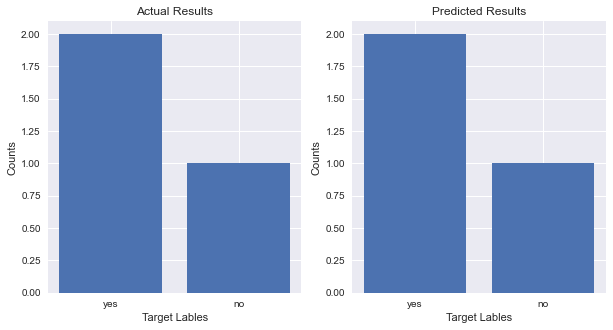

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

ax1.bar(["yes","no"],[actualYesCount,actualNoCount])
ax1.set(xlabel="Target Lables",ylabel="Counts",title="Actual Results")
ax2.bar(["yes","no"],[predictedYesCount,predictedNoCount])
ax2.set(xlabel="Target Lables",ylabel="Counts",title="Predicted Results");

In [3]:
import pandas as pd

data = pd.read_csv("../Datasets/train-data.csv")

,CGPA,Intractiveness,Practical Knowledge,Communication skill,Job offer
0,>=9,yes,very good,good,yes
1,>=8,no,good,moderate,yes
2,>=9,no,average,poor,no
3,<8,no,average,good,no
4,>=8,yes,good,moderate,yes
5,>=9,yes,good,moderate,yes
6,<8,yes,good,poor,no
7,>=9,no,very good,good,yes
8,>=8,yes,good,good,yes
9,>=8,yes,average,good,yes
